In [1]:
import pandas as pd
import numpy as np
import os 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# helper code

def projDirBuilder2(mainDir,projName, fldrIdx=[0,1,2,3,4,5]):
    dirList = ['data','output', 'src', 'models', 'resources', 'visuals']
    os.chdir(mainDir)
    os.makedirs(projName)
    # build the dir to the new project folder
    newDir = os.getcwd() + '/' + projName
    # change directory to the new project folder
    
    os.chdir(newDir)
    
    for idx in fldrIdx:
        os.makedirs(dirList[idx])
    print(f'Directory structure for {projName} created')
    print(f'Current working directory is: {os.getcwd()}')

In [3]:
os.getcwd()

'c:\\Users\\yusuf\\AppData\\Local\\Programs\\Microsoft VS Code'

In [4]:
os.chdir(r'C:\Users\yusuf\Desktop\document\resources\main document folder\one campus materials\techtern vids\Projects')

In [5]:
os.getcwd()

'C:\\Users\\yusuf\\Desktop\\document\\resources\\main document folder\\one campus materials\\techtern vids\\Projects'

In [6]:
# mainDir=os.getcwd()
# projName='room_occupancy'

# projDirBuilder2(mainDir, projName)

In [7]:
os.getcwd()

'C:\\Users\\yusuf\\Desktop\\document\\resources\\main document folder\\one campus materials\\techtern vids\\Projects'

In [8]:
df=pd.read_csv(r"C:\Users\yusuf\Desktop\document\resources\main document folder\one campus materials\techtern vids\rmOccupancy.csv")

In [9]:
df

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/11/2015 14:48,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,2/11/2015 14:49,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2/11/2015 14:50,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,2/11/2015 14:51,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,2/11/2015 14:51,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...
9747,2/18/2015 9:15,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,2/18/2015 9:16,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,2/18/2015 9:16,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,2/18/2015 9:17,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [10]:
#EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           9752 non-null   object 
 1   Temperature    9752 non-null   float64
 2   Humidity       9752 non-null   float64
 3   Light          9752 non-null   float64
 4   CO2            9752 non-null   float64
 5   HumidityRatio  9752 non-null   float64
 6   Occupancy      9752 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 533.4+ KB


In [11]:
df.isna().sum()   

date             0
Temperature      0
Humidity         0
Light            0
CO2              0
HumidityRatio    0
Occupancy        0
dtype: int64

In [12]:
#check target variable: O means unoccupied while 1 means occupied
df.Occupancy.value_counts()

Occupancy
0    7703
1    2049
Name: count, dtype: int64

<Figure size 2000x1000 with 0 Axes>

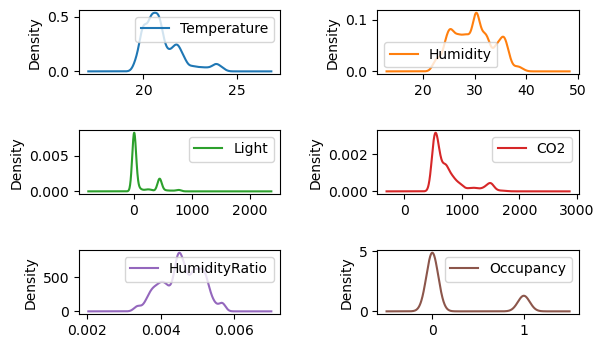

In [13]:
#distribution check
plt.figure(figsize=(20,10))
df.plot(kind='density', subplots=True, layout=(4,2),sharex= False)

plt.tight_layout(pad=2.0)
plt.show()

In [14]:
df.describe()

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000,9752.000000
mean,21.001768,29.891910,123.067930,753.224832,0.004589,0.210111
std,1.020693,3.952844,208.221275,297.096114,0.000531,0.407408
min,19.500000,21.865000,0.000000,484.666667,0.003275,0.000000
25%,20.290000,26.642083,0.000000,542.312500,0.004196,0.000000
50%,20.790000,30.200000,0.000000,639.000000,0.004593,0.000000
75%,21.533333,32.700000,208.250000,831.125000,0.004998,0.000000
max,24.390000,39.500000,1581.000000,2076.500000,0.005769,1.000000


In [15]:
#convert the time 
df['date']=pd.to_datetime(df['date'])
df['date']

0      2015-02-11 14:48:00
1      2015-02-11 14:49:00
2      2015-02-11 14:50:00
3      2015-02-11 14:51:00
4      2015-02-11 14:51:00
               ...        
9747   2015-02-18 09:15:00
9748   2015-02-18 09:16:00
9749   2015-02-18 09:16:00
9750   2015-02-18 09:17:00
9751   2015-02-18 09:19:00
Name: date, Length: 9752, dtype: datetime64[ns]

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9752 entries, 0 to 9751
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           9752 non-null   datetime64[ns]
 1   Temperature    9752 non-null   float64       
 2   Humidity       9752 non-null   float64       
 3   Light          9752 non-null   float64       
 4   CO2            9752 non-null   float64       
 5   HumidityRatio  9752 non-null   float64       
 6   Occupancy      9752 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 533.4 KB


In [17]:
#check for duplicates
df.duplicated().sum()

27

In [18]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [19]:
df.reset_index()

,index,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,0,2015-02-11 14:48:00,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,1,2015-02-11 14:49:00,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,2,2015-02-11 14:50:00,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,3,2015-02-11 14:51:00,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,4,2015-02-11 14:51:00,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...,...,...
9720,9747,2015-02-18 09:15:00,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9721,9748,2015-02-18 09:16:00,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9722,9749,2015-02-18 09:16:00,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9723,9750,2015-02-18 09:17:00,20.8900,28.022500,418.750000,1632.000000,0.004279,1


<Axes: >

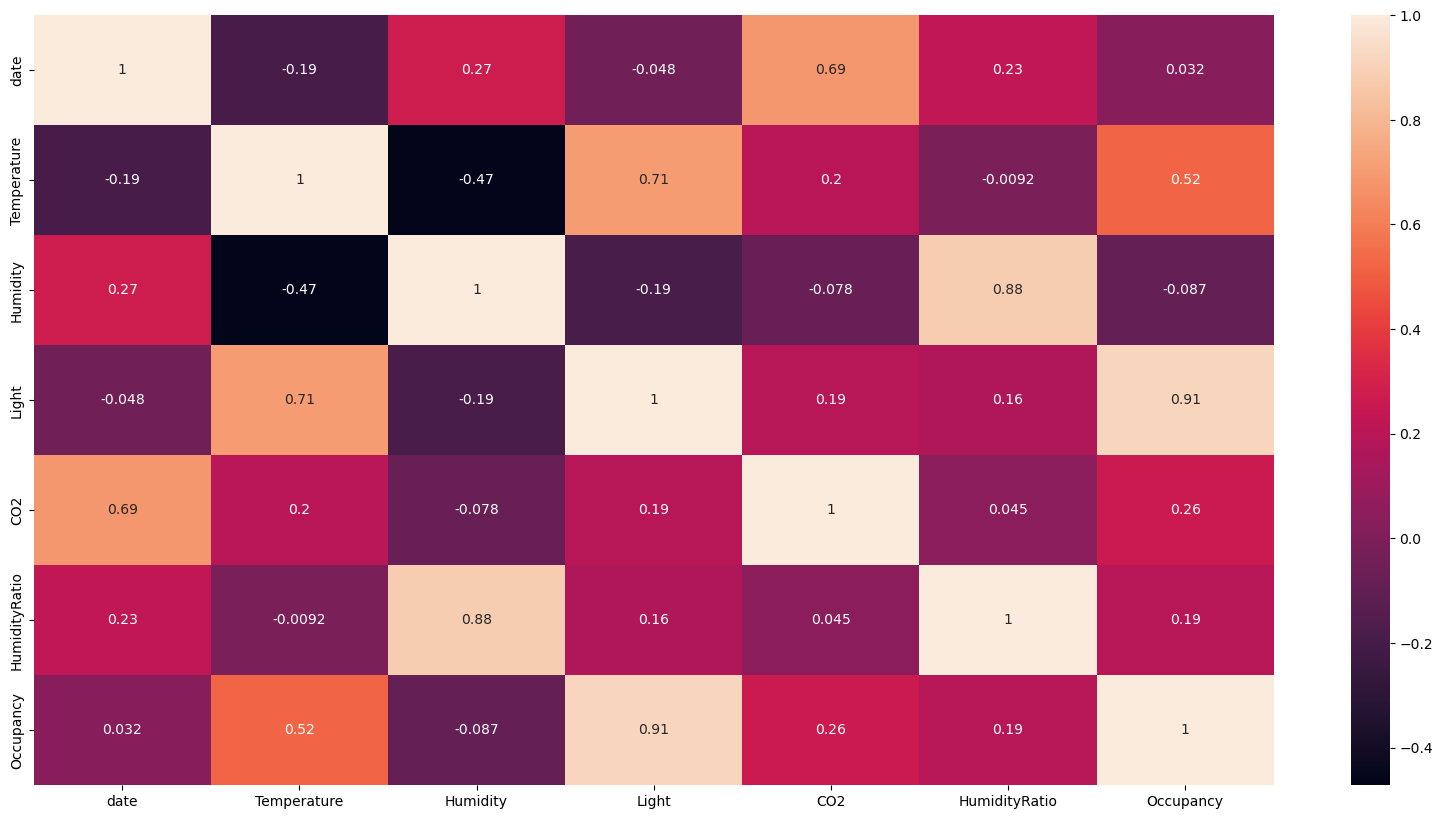

In [20]:
#check for collinearity among features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True)

In [21]:
#drop the date column and work the rest first
df1=df.drop('date', axis=1)
df1

,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,21.7600,31.133333,437.333333,1029.666667,0.005021,1
1,21.7900,31.000000,437.333333,1000.000000,0.005009,1
2,21.7675,31.122500,434.000000,1003.750000,0.005022,1
3,21.7675,31.122500,439.000000,1009.500000,0.005022,1
4,21.7900,31.133333,437.333333,1005.666667,0.005030,1
...,...,...,...,...,...,...
9747,20.8150,27.717500,429.750000,1505.250000,0.004213,1
9748,20.8650,27.745000,423.500000,1514.500000,0.004230,1
9749,20.8900,27.745000,423.500000,1521.500000,0.004237,1
9750,20.8900,28.022500,418.750000,1632.000000,0.004279,1


In [22]:
#separate into X and y
y=df1['Occupancy']
X=df1.drop('Occupancy', axis=1)

In [23]:
X

,Temperature,Humidity,Light,CO2,HumidityRatio
0,21.7600,31.133333,437.333333,1029.666667,0.005021
1,21.7900,31.000000,437.333333,1000.000000,0.005009
2,21.7675,31.122500,434.000000,1003.750000,0.005022
3,21.7675,31.122500,439.000000,1009.500000,0.005022
4,21.7900,31.133333,437.333333,1005.666667,0.005030
...,...,...,...,...,...
9747,20.8150,27.717500,429.750000,1505.250000,0.004213
9748,20.8650,27.745000,423.500000,1514.500000,0.004230
9749,20.8900,27.745000,423.500000,1521.500000,0.004237
9750,20.8900,28.022500,418.750000,1632.000000,0.004279


In [24]:
X.values

array([[2.17600000e+01, 3.11333333e+01, 4.37333333e+02, 1.02966667e+03,
        5.02101100e-03],
       [2.17900000e+01, 3.10000000e+01, 4.37333333e+02, 1.00000000e+03,
        5.00858100e-03],
       [2.17675000e+01, 3.11225000e+01, 4.34000000e+02, 1.00375000e+03,
        5.02156900e-03],
       ...,
       [2.08900000e+01, 2.77450000e+01, 4.23500000e+02, 1.52150000e+03,
        4.23681800e-03],
       [2.08900000e+01, 2.80225000e+01, 4.18750000e+02, 1.63200000e+03,
        4.27948500e-03],
       [2.10000000e+01, 2.81000000e+01, 4.09000000e+02, 1.86400000e+03,
        4.32073200e-03]])

In [25]:
#using the data without feature transformation
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple classifier
#clf = RandomForestClassifier()
clf= LogisticRegression()
clf.fit(X_train, y_train)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
clr = classification_report(y_test, y_pred, target_names={"Occupied","vacant"})
print("Classification Report:\n----------------------\n", clr)

Accuracy: 0.9933161953727506
Classification Report:
----------------------
               precision    recall  f1-score   support

      vacant       1.00      0.99      1.00      1503
    Occupied       0.98      0.99      0.99       442

    accuracy                           0.99      1945
   macro avg       0.99      0.99      0.99      1945
weighted avg       0.99      0.99      0.99      1945



In [26]:
X_train

,Temperature,Humidity,Light,CO2,HumidityRatio
5394,20.200000,30.3900,34.333333,609.25,0.004449
5090,20.100000,33.4000,0.000000,554.00,0.004863
7736,20.150000,30.6000,0.000000,713.00,0.004466
1561,22.150000,27.4425,444.000000,603.00,0.004529
2115,21.000000,24.8000,0.000000,576.00,0.003810
...,...,...,...,...,...
5750,21.917500,30.6000,62.000000,677.25,0.004982
5207,20.100000,32.2900,0.000000,568.00,0.004700
5406,20.390000,30.2000,120.000000,614.75,0.004473
860,20.533333,24.0300,0.000000,561.00,0.003586


In [27]:
#initialize data transformation by normalization
scaler=Normalizer()
normX=scaler.fit_transform(X)
normX

array([[1.94400688e-02, 2.78140690e-02, 3.90707265e-01, 9.19889284e-01,
        4.48569849e-06],
       [1.99522696e-02, 2.83855143e-02, 4.00449406e-01, 9.15661751e-01,
        4.58616605e-06],
       [1.98932067e-02, 2.84426933e-02, 3.96630376e-01, 9.17321982e-01,
        4.58918618e-06],
       ...,
       [1.32238482e-02, 1.75632201e-02, 2.68085194e-01, 9.63144326e-01,
        2.68200277e-06],
       [1.23959405e-02, 1.66283027e-02, 2.48482532e-01, 9.68414308e-01,
        2.53940840e-06],
       [1.10024462e-02, 1.47223209e-02, 2.14285739e-01, 9.76598086e-01,
        2.26374388e-06]])

In [28]:
#using the data with feature transformation (e.g. normalization)
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(normX, y, test_size=0.2, random_state=42)

# Training a simple classifier
#clf = RandomForestClassifier()
clf= LogisticRegression()
clf.fit(X_train, y_train)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
clr = classification_report(y_test, y_pred, target_names={"Occupied","vacant"})
print("Classification Report:\n----------------------\n", clr)

Accuracy: 0.9491002570694087
Classification Report:
----------------------
               precision    recall  f1-score   support

      vacant       0.97      0.97      0.97      1503
    Occupied       0.89      0.89      0.89       442

    accuracy                           0.95      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.95      0.95      0.95      1945



In [29]:
X_train

array([[3.30439673e-02, 4.97131766e-02, 5.61638389e-02, 9.96635500e-01,
        7.27761645e-06],
       [3.61921038e-02, 6.01401128e-02, 0.00000000e+00, 9.97533608e-01,
        8.75551093e-06],
       [2.82236309e-02, 4.28607001e-02, 0.00000000e+00, 9.98682325e-01,
        6.25526005e-06],
       ...,
       [3.24986006e-02, 4.81342687e-02, 1.91261995e-01, 9.79819260e-01,
        7.12998736e-06],
       [3.65433511e-02, 4.27663990e-02, 0.00000000e+00, 9.98416556e-01,
        6.38210109e-06],
       [2.10179892e-02, 2.83487242e-02, 4.33574398e-01, 9.00426474e-01,
        4.57830739e-06]])

In [30]:
# feature selection using recursive feature elimination
model= LogisticRegression()
rfe=RFE(model,n_features_to_select=4)
rfe.fit(normX,y)

RFE(estimator=LogisticRegression(), n_features_to_select=4)

In [31]:
rfe.n_features_

4

In [32]:
rfe.support_

array([ True,  True,  True,  True, False])

In [33]:
rfe.ranking_

array([1, 1, 1, 1, 2])

This means the first 4 features all contributed at same rate to the model prediction, then followed my feature no 5 (humidity ratio), hence we can remove it and test the effects of the other features

In [34]:
normXX= normX[ :,:-1]
normXX

array([[0.01944007, 0.02781407, 0.39070726, 0.91988928],
       [0.01995227, 0.02838551, 0.40044941, 0.91566175],
       [0.01989321, 0.02844269, 0.39663038, 0.91732198],
       ...,
       [0.01322385, 0.01756322, 0.26808519, 0.96314433],
       [0.01239594, 0.0166283 , 0.24848253, 0.96841431],
       [0.01100245, 0.01472232, 0.21428574, 0.97659809]])

In [35]:
#using the data with feature transformation (e.g. normalization) and feature selection (RFE)
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(normXX, y, test_size=0.2, random_state=42)

# Training a simple classifier
#clf = RandomForestClassifier()
clf= LogisticRegression()
clf.fit(X_train, y_train)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
clr = classification_report(y_test, y_pred, target_names={"Occupied","vacant"})
print("Classification Report:\n----------------------\n", clr)

Accuracy: 0.9491002570694087
Classification Report:
----------------------
               precision    recall  f1-score   support

      vacant       0.97      0.97      0.97      1503
    Occupied       0.89      0.89      0.89       442

    accuracy                           0.95      1945
   macro avg       0.93      0.93      0.93      1945
weighted avg       0.95      0.95      0.95      1945



* It can be seen that the model accuracy didnot change even after removing the feature "humidityratio".

In [36]:
# Convert the datetime objects to Unix timestamps (seconds since epoch)
df['unix_timestamp'] = df['date'].apply(lambda x: x.timestamp())

# Display the first few rows to verify
print(df.head())

                 date  Temperature   Humidity       Light          CO2  \
0 2015-02-11 14:48:00      21.7600  31.133333  437.333333  1029.666667   
1 2015-02-11 14:49:00      21.7900  31.000000  437.333333  1000.000000   
2 2015-02-11 14:50:00      21.7675  31.122500  434.000000  1003.750000   
3 2015-02-11 14:51:00      21.7675  31.122500  439.000000  1009.500000   
4 2015-02-11 14:51:00      21.7900  31.133333  437.333333  1005.666667   

   HumidityRatio  Occupancy  unix_timestamp  
0       0.005021          1    1.423666e+09  
1       0.005009          1    1.423666e+09  
2       0.005022          1    1.423666e+09  
3       0.005022          1    1.423666e+09  
4       0.005030          1    1.423666e+09  


In [37]:
XX=df.drop(['Occupancy','date'], axis=1)
XX.isna().sum()


Temperature       0
Humidity          0
Light             0
CO2               0
HumidityRatio     0
unix_timestamp    0
dtype: int64

In [38]:
XX=XX.values
XX

array([[2.17600000e+01, 3.11333333e+01, 4.37333333e+02, 1.02966667e+03,
        5.02101100e-03, 1.42366608e+09],
       [2.17900000e+01, 3.10000000e+01, 4.37333333e+02, 1.00000000e+03,
        5.00858100e-03, 1.42366614e+09],
       [2.17675000e+01, 3.11225000e+01, 4.34000000e+02, 1.00375000e+03,
        5.02156900e-03, 1.42366620e+09],
       ...,
       [2.08900000e+01, 2.77450000e+01, 4.23500000e+02, 1.52150000e+03,
        4.23681800e-03, 1.42425096e+09],
       [2.08900000e+01, 2.80225000e+01, 4.18750000e+02, 1.63200000e+03,
        4.27948500e-03, 1.42425102e+09],
       [2.10000000e+01, 2.81000000e+01, 4.09000000e+02, 1.86400000e+03,
        4.32073200e-03, 1.42425114e+09]])

In [39]:
#using the data with unix time code date convertion
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(XX, y, test_size=0.2, random_state=42)

# Training a simple classifier
#clf = RandomForestClassifier()
clf= LogisticRegression()
clf.fit(X_train, y_train)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
clr = classification_report(y_test, y_pred, target_names={"Occupied","vacant"})
print("Classification Report:\n----------------------\n", clr)

Accuracy: 0.7727506426735219
Classification Report:
----------------------
               precision    recall  f1-score   support

      vacant       0.77      1.00      0.87      1503
    Occupied       0.00      0.00      0.00       442

    accuracy                           0.77      1945
   macro avg       0.39      0.50      0.44      1945
weighted avg       0.60      0.77      0.67      1945



c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [40]:
X_train

array([[2.02000000e+01, 3.03900000e+01, 3.43333333e+01, 6.09250000e+02,
        4.44885600e-03, 1.42398972e+09],
       [2.01000000e+01, 3.34000000e+01, 0.00000000e+00, 5.54000000e+02,
        4.86254600e-03, 1.42397148e+09],
       [2.01500000e+01, 3.06000000e+01, 0.00000000e+00, 7.13000000e+02,
        4.46588500e-03, 1.42413024e+09],
       ...,
       [2.03900000e+01, 3.02000000e+01, 1.20000000e+02, 6.14750000e+02,
        4.47343700e-03, 1.42399044e+09],
       [2.05333333e+01, 2.40300000e+01, 0.00000000e+00, 5.61000000e+02,
        3.58603700e-03, 1.42371768e+09],
       [2.17900000e+01, 2.93900000e+01, 4.49500000e+02, 9.33500000e+02,
        4.74647300e-03, 1.42410342e+09]])

In [41]:
normXXX=scaler.fit_transform(XX)
normXXX

array([[1.52844830e-08, 2.18684239e-08, 3.07188139e-07, 7.23250123e-07,
        3.52681789e-12, 1.00000000e+00],
       [1.53055547e-08, 2.17747681e-08, 3.07188126e-07, 7.02411873e-07,
        3.51808676e-12, 1.00000000e+00],
       [1.52897498e-08, 2.18608126e-08, 3.04846740e-07, 7.05045888e-07,
        3.52720954e-12, 1.00000000e+00],
       ...,
       [1.46673589e-08, 1.94804152e-08, 2.97349282e-07, 1.06828083e-06,
        2.97476928e-12, 1.00000000e+00],
       [1.46673583e-08, 1.96752536e-08, 2.94014183e-07, 1.14586542e-06,
        3.00472665e-12, 1.00000000e+00],
       [1.47445906e-08, 1.97296665e-08, 2.87168455e-07, 1.30875795e-06,
        3.03368688e-12, 1.00000000e+00]])

In [42]:
#using the data with unix time code date convertion and normalization
# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(normXXX, y, test_size=0.2, random_state=42)

# Training a simple classifier
#clf = RandomForestClassifier()
clf= LogisticRegression()
clf.fit(X_train, y_train)

# Predicting and evaluating the classifier
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
clr = classification_report(y_test, y_pred, target_names={"Occupied","vacant"})
print("Classification Report:\n----------------------\n", clr)

Accuracy: 0.7727506426735219
Classification Report:
----------------------
               precision    recall  f1-score   support

      vacant       0.77      1.00      0.87      1503
    Occupied       0.00      0.00      0.00       442

    accuracy                           0.77      1945
   macro avg       0.39      0.50      0.44      1945
weighted avg       0.60      0.77      0.67      1945



c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\yusuf\anaconda3\envs\python_pracitice\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, le

In [43]:
X_train

array([[1.41854957e-08, 2.13414462e-08, 2.41106609e-08, 4.27847190e-07,
        3.12421918e-12, 1.00000000e+00],
       [1.41154512e-08, 2.34555259e-08, 0.00000000e+00, 3.89052736e-07,
        3.41477766e-12, 1.00000000e+00],
       [1.41489868e-08, 2.14867988e-08, 0.00000000e+00, 5.00656457e-07,
        3.13586839e-12, 1.00000000e+00],
       ...,
       [1.43189164e-08, 2.12080075e-08, 8.42702287e-08, 4.31709359e-07,
        3.14147966e-12, 1.00000000e+00],
       [1.44223350e-08, 1.68783463e-08, 0.00000000e+00, 3.94038796e-07,
        2.51878378e-12, 1.00000000e+00],
       [1.53008550e-08, 2.06375461e-08, 3.15637189e-07, 6.55500146e-07,
        3.33295527e-12, 1.00000000e+00]])